In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [20]:
#liest die Datensätze ein
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
y_train = train.SalePrice
all_data = pd.concat([train, test])
all_data.drop('Id', inplace=True, axis=1)
all_data.drop('SalePrice', inplace=True, axis=1)

In [21]:
col = all_data.dtypes[all_data.dtypes == "object"].index
nol = all_data.dtypes[all_data.dtypes != "object"].index
all_data[col] = all_data[col].fillna("FillNaN")
all_data = pd.get_dummies(all_data, columns=col)
all_data[nol] = all_data[nol].fillna(all_data[nol].mean())

In [22]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

In [23]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model,np.log1p(X_train) , np.log1p(y_train), scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

0.0002
0.00019
0.00018
0.00017
0.00016
0.00015
0.00014
0.00013
0.00012
0.00011
0.0001
9e-05
8e-05
7e-05
6e-05
5e-05
4e-05
3e-05
2e-05
1e-05


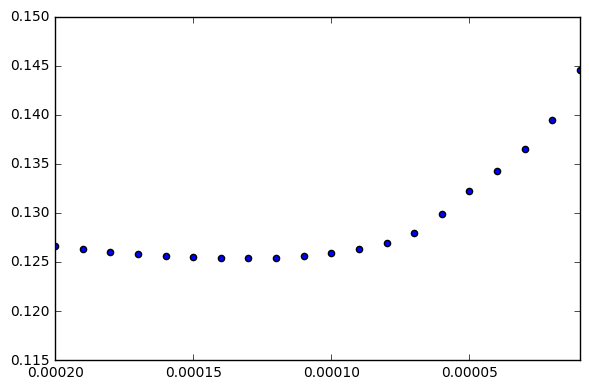

Anzahl der Coef:  64
Plot zeigen ? (y/n)


In [24]:
from sklearn.linear_model import LassoCV 
#To try out to find the best alpha 
for x in (np.linspace(2e-4,1e-5,20)):
    print(x)
    model_lasso = LassoCV(n_jobs=-1, positive=True, alphas=[x],normalize=True)
    plt.scatter(x,rmse_cv(model_lasso).mean())
plt.xlim(2e-4,1e-5)
plt.tight_layout()
plt.show()

model_lasso = LassoCV(n_jobs=-1, positive=True, alphas=[0.00012],normalize=True)
model_lasso.fit(np.log1p(X_train),np.log1p(y_train))
indices = np.argsort(model_lasso.coef_)
mask = model_lasso.coef_ != 0
coef = pd.Series(model_lasso.coef_[mask], index=X_train.columns[mask])
print('Anzahl der Coef: ',len(coef))
X_new = X_train[coef.index]
x=input("Plot zeigen ? (y/n)")
if x == 'y':
    matplotlib.rcParams['figure.figsize'] = (8.0, 15.0)
    coef.sort_values().plot(kind = "barh")
    plt.title("Coefficients in the Lasso Model")
    plt.grid()
    plt.show()

In [25]:

"""
from sklearn.model_selection import train_test_split

X_train, X_test2, y_train2, y_test = train_test_split(X_new, y_train, test_size=0.4, random_state=0)

clf = LassoCV(n_jobs=-1, positive=True, alphas=[0.00012],normalize=True)
clf.fit(np.log1p(X_train),np.log1p(y_train2))
X = X_test2[coef.index]
predicted1 = np.expm1(clf.predict(np.log1p(X)))
plt.figure(figsize=(8,8))
#plt.scatter(predicted, y_test)
#plt.xlim(0,8e5)
#plt.ylim(0,8e5)
print(np.std(predicted-y_test))
plt.grid()
plt.hist(np.abs(predicted-y_test), np.linspace(0,1.7e5,20))
plt.show()
"""

'\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test2, y_train2, y_test = train_test_split(X_new, y_train, test_size=0.4, random_state=0)\n\nclf = LassoCV(n_jobs=-1, positive=True, alphas=[0.00012],normalize=True)\nclf.fit(np.log1p(X_train),np.log1p(y_train2))\nX = X_test2[coef.index]\npredicted1 = np.expm1(clf.predict(np.log1p(X)))\nplt.figure(figsize=(8,8))\n#plt.scatter(predicted, y_test)\n#plt.xlim(0,8e5)\n#plt.ylim(0,8e5)\nprint(np.std(predicted-y_test))\nplt.grid()\nplt.hist(np.abs(predicted-y_test), np.linspace(0,1.7e5,20))\nplt.show()\n'

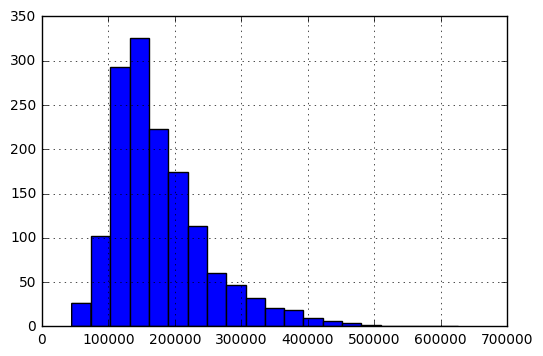

In [26]:
clf = LassoCV(n_jobs=-1, positive=True, alphas=[0.00012],normalize=True)
clf.fit(np.log1p(X_new),np.log1p(y_train))
X = X_test[coef.index]
predicted1 = np.expm1(clf.predict(np.log1p(X)))
plt.grid()
plt.hist(predicted,20)
plt.show()

5.0
7.03448275862
9.06896551724
11.1034482759
13.1379310345
15.1724137931
17.2068965517
19.2413793103
21.275862069
23.3103448276
25.3448275862
27.3793103448
29.4137931034
31.4482758621
33.4827586207
35.5172413793
37.5517241379
39.5862068966
41.6206896552
43.6551724138
45.6896551724
47.724137931
49.7586206897
51.7931034483
53.8275862069
55.8620689655
57.8965517241
59.9310344828
61.9655172414
64.0


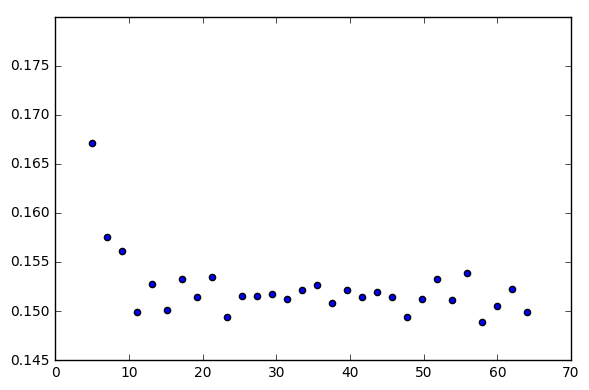

In [27]:
from sklearn.ensemble import RandomForestRegressor

#To try out to find the best alpha 
for x in (np.linspace(5,64,30)):
    print(x)
    clf = RandomForestRegressor(max_depth=x, n_jobs=-1)
    plt.scatter(x,rmse_cv(clf).mean())
#   plt.plot(x,rmse_cv(model_lasso).mean())
plt.tight_layout()
plt.show()

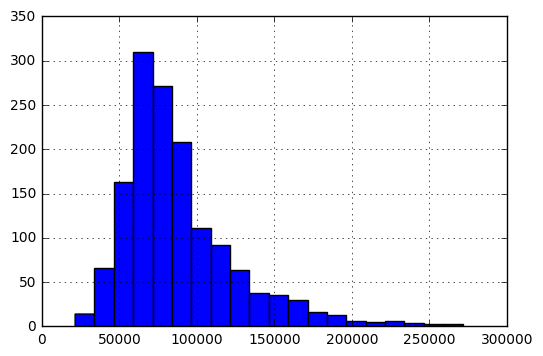

In [28]:
clf = RandomForestRegressor(max_depth=17, n_jobs=-1)
rmse_cv(clf).mean()
clf.fit(np.log1p(X_new),np.log1p(y_train))
X = X_test[coef.index]
predicted2 = np.expm1(clf.predict(np.log1p(X)))
plt.grid()
plt.hist((predicted2)/2,20)
plt.show()

import csv
with open('sample_submission.csv', 'w') as csvfile:
    fieldnames = ['Id', 'SalePrice']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for x in range(len(predicted)):
        writer.writerow({'Id': 1461+x, 'SalePrice': np.abs(predicted2[x])})